In [44]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


diamonds = sns.load_dataset("diamonds")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
diamonds.shape

(53940, 10)

In [46]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [47]:
diamonds.describe(exclude=np.number)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [48]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [49]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [50]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [51]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [52]:
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [54]:
X_test.shape

(13485, 9)

In [55]:
X_prediction=X_test.head(100)
y_prediction =y_test.head(100)


In [56]:
y_prediction=np.array(y_prediction)

In [57]:
type(y_prediction)

numpy.ndarray

In [58]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Cross-Validation


In [59]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)



In [60]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2874.224552,9.424846,2876.318793,36.995997
1,2088.350837,7.595382,2093.063623,25.351925
2,1552.629638,4.974140,1560.552731,19.550836
3,1185.994963,4.133544,1198.669943,14.648669
4,943.402904,4.757288,962.349383,11.724038


In [61]:
best_rmse = results['test-rmse-mean'].min()

best_rmse


550.2735543625861

# Train way

In [62]:

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 1000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50, # Every ten rounds
   early_stopping_rounds=20

)


[0]	validation-rmse:2817.90814	train-rmse:2874.49146


[50]	validation-rmse:554.13365	train-rmse:438.68033
[100]	validation-rmse:553.73941	train-rmse:381.96310
[150]	validation-rmse:551.25006	train-rmse:339.03503
[200]	validation-rmse:556.18693	train-rmse:308.00219
[250]	validation-rmse:557.61263	train-rmse:283.21559
[300]	validation-rmse:559.05657	train-rmse:260.57418
[350]	validation-rmse:560.65574	train-rmse:243.73253
[400]	validation-rmse:562.32328	train-rmse:228.60311
[450]	validation-rmse:563.18017	train-rmse:213.77568
[500]	validation-rmse:564.77532	train-rmse:201.44074
[550]	validation-rmse:566.71920	train-rmse:191.07173
[600]	validation-rmse:567.56507	train-rmse:181.24398
[650]	validation-rmse:568.47124	train-rmse:172.37143
[700]	validation-rmse:569.60635	train-rmse:164.75530
[750]	validation-rmse:570.41258	train-rmse:155.76096
[800]	validation-rmse:570.93443	train-rmse:149.22645
[850]	validation-rmse:571.72429	train-rmse:142.83847
[900]	validation-rmse:572.77341	train-rmse:136.69104
[950]	validation-rmse:574.11945	train-rmse:131.

In [63]:
import xgboost as xgb
import matplotlib.pyplot as plt

prediction=xgb.DMatrix(X_prediction,y_prediction,  enable_categorical=True)



In [64]:
pre_res=model.predict(prediction)

In [65]:
pre_res.shape

(100,)

In [66]:
y_prediction=np.array(y_prediction)

y_prediction=y_prediction.reshape(len(y_prediction),)
y_prediction.shape

(100,)

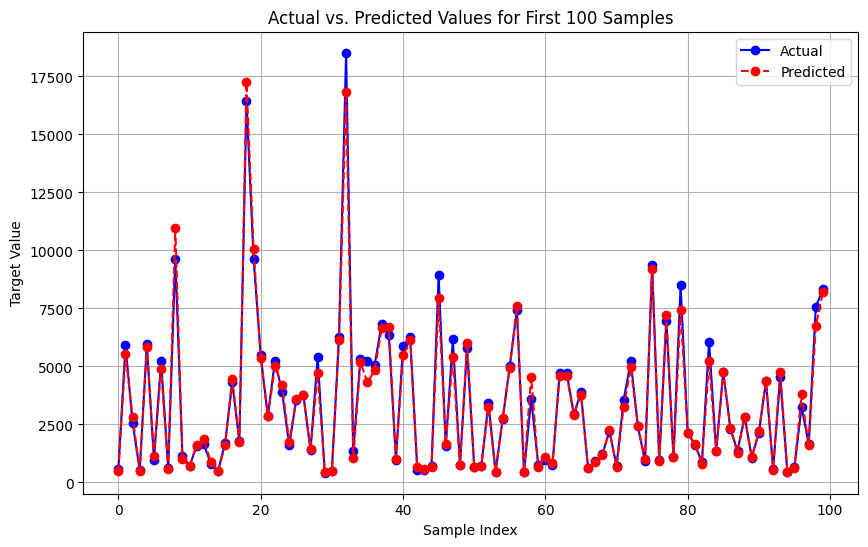

In [67]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost model and have `model` defined


# Create a list of sample indices (0 to 9) for labeling
sample_indices = list(range(len(y_prediction)))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_prediction, marker='o', linestyle='-', label='Actual', color='b')
plt.plot(sample_indices, pre_res, marker='o', linestyle='--', label='Predicted', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values for First 100 Samples')
plt.legend()
plt.grid(True)
plt.show()
